<a href="https://colab.research.google.com/github/subi-147/TimeSeries_lab/blob/main/TSA_EXP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", periods=100, freq="D")
data = pd.DataFrame({
    'date': date_range,
    'value': np.random.randn(100).cumsum() + 100
})

In [ ]:
data.set_index('date', inplace=True)

In [ ]:
data['lag_1'] = data['value'].shift(1)
data['lag_2'] = data['value'].shift(2)

In [ ]:
data = data.dropna()

In [ ]:
X = data[['lag_1', 'lag_2']]
y = data['value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.44508270300184716


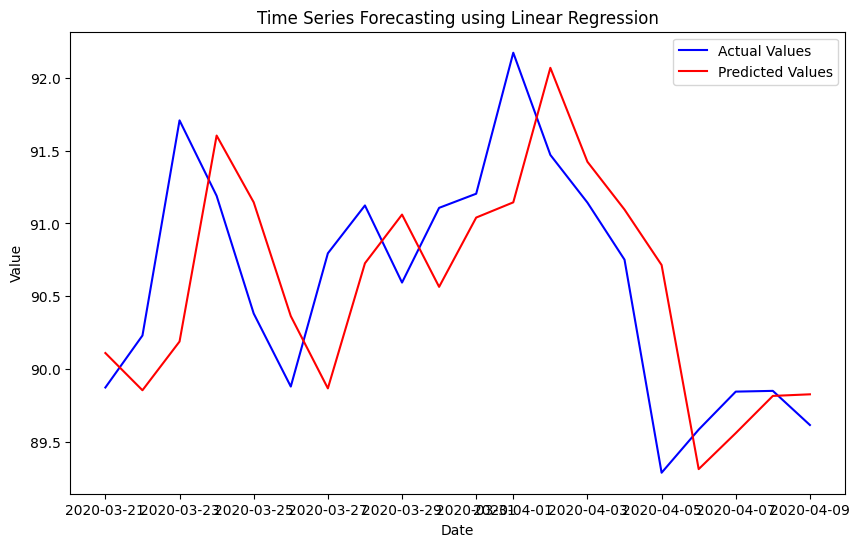

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Values', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting using Linear Regression')
plt.show()